# Bike Share System

## Modeling a Bike Share System

Imagine a bike share system for students traveling between Olin College and Wellesley College, which are about three miles apart in eastern Massachusetts.

Suppose the system contains 12 bikes and two bike racks, one at Olin and one at Wellesley, each with the capacity to hold 12 bikes.

As students arrive, check out a bike, and ride to the other campus, the number of bikes in each location changes. In the simulation, we'll need to keep track of where the bikes are. To do that, we'll use a function called `State`, which is defined in the ModSim library.

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [3]:
# import functions from modsim
from modsim import *

In [4]:
def step(state, p1, p2):
    """Simulate one time step.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley ride
    p2: probability of a Wellesley->Olin ride
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1
    
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1

In [5]:
def run_simulation(state, p1, p2, num_steps, do_plot=True):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    results_olin = TimeSeries()
    results_olin[0] = state.olin
    results_wellesley = TimeSeries()
    results_wellesley[0] = state.wellesley
    results_olin_unsatisfied = TimeSeries()
    results_olin_unsatisfied[0] = state.olin_empty
    results_wellesley_unsatisfied = TimeSeries()
    results_wellesley_unsatisfied[0] = state.wellesley_empty
    
    for i in range(num_steps):
        step(state, p1, p2)
        results_olin[i+1] = state.olin
        results_wellesley[i+1] = state.wellesley
        results_olin_unsatisfied[i+1] = state.olin_empty
        results_wellesley_unsatisfied[i+1] = state.wellesley_empty
        
    if (do_plot):
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        ax[0].plot(results_olin, label='Olin')
        ax[0].plot(results_wellesley, label='Wellesley')
        ax[0].set_xlabel('Time step (min)')
        ax[0].set_ylabel('Number of bikes')
        ax[0].legend()
        ax[1].plot(results_olin_unsatisfied, label='Olin')
        ax[1].plot(results_wellesley_unsatisfied, label='Wellesley')
        ax[1].set_xlabel('Time step (min)')
        ax[1].set_ylabel('Number of unsatisfied customers')
        ax[1].legend()
        plt.show()
    
    return results_olin_unsatisfied[num_steps-1] + results_wellesley_unsatisfied[num_steps-1]

In [6]:
p_olin_to_wellesley = 0.3
p_wellesley_to_olin = 0.2

N_slots = 12

nstart = []
tu_avg = []

num_sims = 100

for N_start_olin in range(N_slots+1):
    nstart.append(N_start_olin)
    N_start_wellesley = N_slots - N_start_olin

    print(N_start_olin, N_start_wellesley)

    tu_sum = 0
    
    for j in range(num_sims):
        bikeshare = State(olin=N_start_olin, wellesley=N_start_wellesley,
                  olin_empty=0, wellesley_empty=0)
        do_plot = False
        total_unsatisfied = run_simulation(bikeshare, p_wellesley_to_olin, p_olin_to_wellesley, 100, do_plot)

        #print("Total unsatisfied customers: ", j, total_unsatisfied)
        tu_sum += total_unsatisfied
    
    print("Average unsatisfied customers: ", tu_sum/(1.0*num_sims))
    tu_avg.append(tu_sum/(1.0*num_sims))
    


0 12
Average unsatisfied customers:  3.48
1 11
Average unsatisfied customers:  3.37
2 10
Average unsatisfied customers:  3.01
3 9
Average unsatisfied customers:  3.74
4 8
Average unsatisfied customers:  4.16
5 7
Average unsatisfied customers:  4.18
6 6
Average unsatisfied customers:  6.46
7 5
Average unsatisfied customers:  6.27
8 4
Average unsatisfied customers:  7.09
9 3
Average unsatisfied customers:  7.03
10 2
Average unsatisfied customers:  9.04
11 1
Average unsatisfied customers:  10.01
12 0
Average unsatisfied customers:  10.03


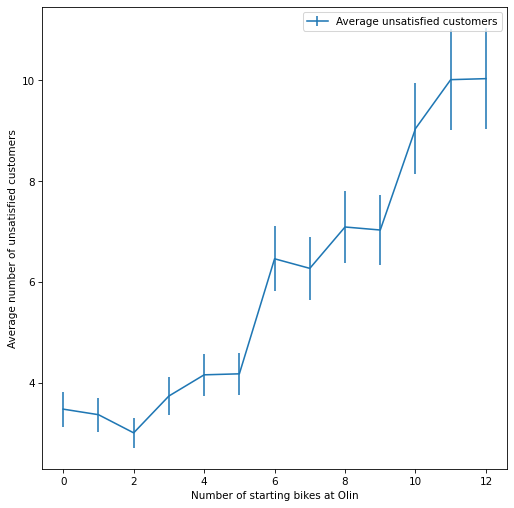

In [7]:
tu_avg_error = 0.1*np.array(tu_avg)

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.errorbar(nstart, tu_avg, tu_avg_error, label='Average unsatisfied customers')
ax.set_xlabel('Number of starting bikes at Olin')
ax.set_ylabel('Average number of unsatisfied customers')
ax.legend()

In [22]:
# Now lets try with 3 locations instead of 2

def steps3(state, p1, p2, p3, p4, p5, p6):
    """Simulate one time step.
    
    state: bikeshare State object
    p1: probability of an CNU->NSU ride
    p2: probability of a NSU->CNU ride
    p3: probability of a HU->CNU ride
    p4: probability of a CNU->NSU customer arrival
    p5: probability of a NSU->CNU customer arrival
    p6: probability of a HU->CNU customer arrival
    """
    if flip(p1):
        cnu_to_nsu(state)
        
    if flip(p2):
        nsu_to_cnu(state)
        
    if flip(p3):
        hu_to_cnu(state)
        
    if flip(p4):
        cnu_to_hu(state)
        
    if flip(p5):
        nsu_to_hu(state)
        
    if flip(p6):
        hu_to_nsu(state)
        
def cnu_to_nsu(state):
    """Move one bike from CNU to NSU.
    
    state: bikeshare State object
    """
    if state.cnu == 0:
        state.cnu_empty += 1
        return
    state.cnu -= 1
    state.nsu += 1
    
def nsu_to_cnu(state):
    """Move one bike from NSU to CNU.
    
    state: bikeshare State object
    """
    
    if state.nsu == 0:
        state.nsu_empty += 1
        return
    state.nsu -= 1
    state.cnu += 1
    
def cnu_to_hu(state):
    """Move one bike from HU to CNU.
    
    state: bikeshare State object
    """
    
    if state.hu == 0:
        state.hu_empty += 1
        return
    state.hu -= 1
    state.cnu += 1
    
def hu_to_cnu(state):
    """Move one bike from CNU to HU.
    
    state: bikeshare State object
    """
    
    if state.cnu == 0:
        state.cnu_empty += 1
        return
    state.cnu -= 1
    state.hu += 1
    
def nsu_to_hu(state):
    """Move one bike from NSU to HU.
    
    state: bikeshare State object
    """
    
    if state.nsu == 0:
        state.nsu_empty += 1
        return
    state.nsu -= 1
    state.hu += 1
    
def hu_to_nsu(state):
    """Move one bike from HU to NSU.
    
    state: bikeshare State object
    """
    
    if state.hu == 0:
        state.hu_empty += 1
        return
    state.hu -= 1
    state.nsu += 1

In [27]:
def run_simulation3(state, p1, p2, p3, p4, p5, p6, num_steps, do_plot=True):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an CNU->NSU customer arrival
    p2: probability of a NSU->CNU customer arrival
    p3: probability of a HU->CNU customer arrival
    p4: probability of an CNU->NSU ride
    p5: probability of a NSU->CNU ride
    p6: probability of a HU->CNU ride
    num_steps: number of time steps
    """
    results_cnu = TimeSeries()
    results_cnu[0] = state.cnu
    results_nsu = TimeSeries()
    results_nsu[0] = state.nsu
    results_hu = TimeSeries()
    results_hu[0] = state.hu
    results_cnu_unsatisfied = TimeSeries()
    results_cnu_unsatisfied[0] = state.cnu_empty
    results_nsu_unsatisfied = TimeSeries()
    results_nsu_unsatisfied[0] = state.nsu_empty
    results_hu_unsatisfied = TimeSeries()
    results_hu_unsatisfied[0] = state.hu_empty
    
    for i in range(num_steps):
        steps3(state, p1, p2, p3, p4, p5, p6)
        results_cnu[i+1] = state.cnu
        results_nsu[i+1] = state.nsu
        results_hu[i+1] = state.hu
        results_cnu_unsatisfied[i+1] = state.cnu_empty
        results_nsu_unsatisfied[i+1] = state.nsu_empty
        results_hu_unsatisfied[i+1] = state.hu_empty
        
    if (do_plot):
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        ax[0].plot(results_cnu, label='CNU')
        ax[0].plot(results_nsu, label='NSU')
        ax[0].plot(results_hu, label='HU')
        ax[0].set_xlabel('Time step (min)')
        ax[0].set_ylabel('Number of bikes')
        ax[0].legend()
        ax[1].plot(results_cnu_unsatisfied, label='CNU')
        ax[1].plot(results_nsu_unsatisfied, label='NSU')
        ax[1].plot(results_hu_unsatisfied, label='HU')
        ax[1].set_xlabel('Time step (min)')
        ax[1].set_ylabel('Number of unsatisfied customers')
        ax[1].legend()
        plt.show()
    
    return results_cnu_unsatisfied[num_steps-1] + results_nsu_unsatisfied[num_steps-1] + results_hu_unsatisfied[num_steps-1]

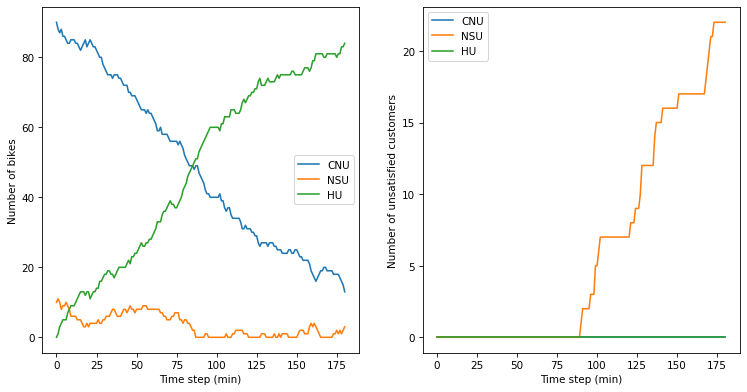

Total unsatisfied customers:  22


In [42]:
# single run for testing purposes
p_cnu_to_nsu = 0.3
p_nsu_to_cnu = 0.2
p_cnu_to_hu = 0.4
p_hu_to_cnu = 0.1
p_nsu_to_hu = 0.35
p_hu_to_nsu = 0.15

N_slots = 100

nstart = []
tu_avg = []

num_sims = 100
N_start_cnu = 90
N_start_nsu = 10
N_start_hu = 0

# run simulation for 180 time steps
bikeshare = State(cnu=N_start_cnu, nsu=N_start_nsu, hu=N_start_hu,
                  cnu_empty=0, nsu_empty=0, hu_empty=0)
do_plot = True
total_unsatisfied = run_simulation3(bikeshare, p_cnu_to_nsu, p_nsu_to_cnu, p_cnu_to_hu, p_hu_to_cnu, p_nsu_to_hu, p_hu_to_nsu, 180, do_plot)

print("Total unsatisfied customers: ", total_unsatisfied)


In [114]:
p_cnu_to_nsu = 0.3
p_nsu_to_cnu = 0.2
p_cnu_to_hu = 0.4
p_hu_to_cnu = 0.1
p_nsu_to_hu = 0.35
p_hu_to_nsu = 0.15

N_slots = 100

nstartcnu = []
nstartnsu = []
nstarthu = []

tu_avg = []

num_sims = 10

# run simulation for 180 time steps and incrementing by 10 bikes but we must keep a total 100 bikes between the 3 locations
for N_start_cnu in range(N_slots, -10, -10):
    for N_start_nsu in range(N_slots, -10, -10):
        for N_start_hu in range(N_slots):
            if (N_start_cnu + N_start_nsu + N_start_hu == 100):
                nstartcnu.append(N_start_cnu)
                nstartnsu.append(N_start_nsu)
                nstarthu.append(N_start_hu)

                print(N_start_cnu, N_start_nsu, N_start_hu)

                tu_sum = 0

                for j in range(num_sims):
                    bikeshare = State(cnu=N_start_cnu, nsu=N_start_nsu, hu=N_start_hu,
                                      cnu_empty=0, nsu_empty=0, hu_empty=0)
                    do_plot = False
                    total_unsatisfied = run_simulation3(bikeshare, p_cnu_to_nsu, p_nsu_to_cnu, p_cnu_to_hu, p_hu_to_cnu, p_nsu_to_hu, p_hu_to_nsu, 180, do_plot)

                    #print("Total unsatisfied customers: ", j, total_unsatisfied)
                    tu_sum += total_unsatisfied
                
                tu_avg.append(tu_sum/(1.0*num_sims))

                print("Average unsatisfied customers: ", tu_sum/(1.0*num_sims))

100 0 0
Average unsatisfied customers:  26.1
90 10 0
Average unsatisfied customers:  13.1
90 0 10
Average unsatisfied customers:  18.8
80 20 0
Average unsatisfied customers:  4.2
80 10 10
Average unsatisfied customers:  12.5
80 0 20
Average unsatisfied customers:  26.8
70 30 0
Average unsatisfied customers:  9.1
70 20 10
Average unsatisfied customers:  14.8
70 10 20
Average unsatisfied customers:  18.9
70 0 30
Average unsatisfied customers:  37.8
60 40 0
Average unsatisfied customers:  9.7
60 30 10
Average unsatisfied customers:  17.7
60 20 20
Average unsatisfied customers:  21.2
60 10 30
Average unsatisfied customers:  27.2
60 0 40
Average unsatisfied customers:  46.3
50 50 0
Average unsatisfied customers:  23.6
50 40 10
Average unsatisfied customers:  27.1
50 30 20
Average unsatisfied customers:  32.6
50 20 30
Average unsatisfied customers:  38.3
50 10 40
Average unsatisfied customers:  47.4
50 0 50
Average unsatisfied customers:  65.6
40 60 0
Average unsatisfied customers:  28.7
40 

In [115]:
# find minimum average unsatisfied customers and the corresponding starting conditions
min_tu_avg = min(tu_avg)
min_tu_avg_index = tu_avg.index(min_tu_avg)
print("Minimum average unsatisfied customers: ", min_tu_avg)
print("Starting conditions: ", nstartcnu[min_tu_avg_index], nstartnsu[min_tu_avg_index], nstarthu[min_tu_avg_index])

Minimum average unsatisfied customers:  4.2
Starting conditions:  80 20 0


Best Configuration is 80 bikes at CNU, 20 bikes at NSU, and 0 bikes at HU. This is probably related to the fact that bikes are more likely to end up at HU than the other two locations, so it is better to start with 0 bikes at HU.

## Under the Hood

This section contains additional information about the functions we've used and pointers to their documentation.

You don't need to know anything in this section, so if you are already feeling overwhelmed, you might want to skip it.
But if you are curious, read on.

`State` and `TimeSeries` objects are based on the `Series` object defined by the Pandas library.
The documentation is at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html>.

`Series` objects provide their own `plot` function, which is why we call it like this:

```
results.plot()
```

Instead of like this:

```
plot(results)
```

You can read the documentation of `Series.plot` at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html>.

`decorate` is based on Matplotlib, which is a widely used plotting library for Python.  Matplotlib provides separate functions for `title`, `xlabel`, and `ylabel`.
`decorate` makes them a little easier to use.
For the list of keyword arguments you can pass to `decorate`, see <https://matplotlib.org/3.2.2/api/axes_api.html?highlight=axes#module-matplotlib.axes>.

The `flip` function uses NumPy's `random` function to generate a random number between 0 and 1, then returns `True` or `False` with the given probability.

You can get the source code for `flip` (or any other function) by running the following cell.

In [113]:
source_code(flip)

def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p
